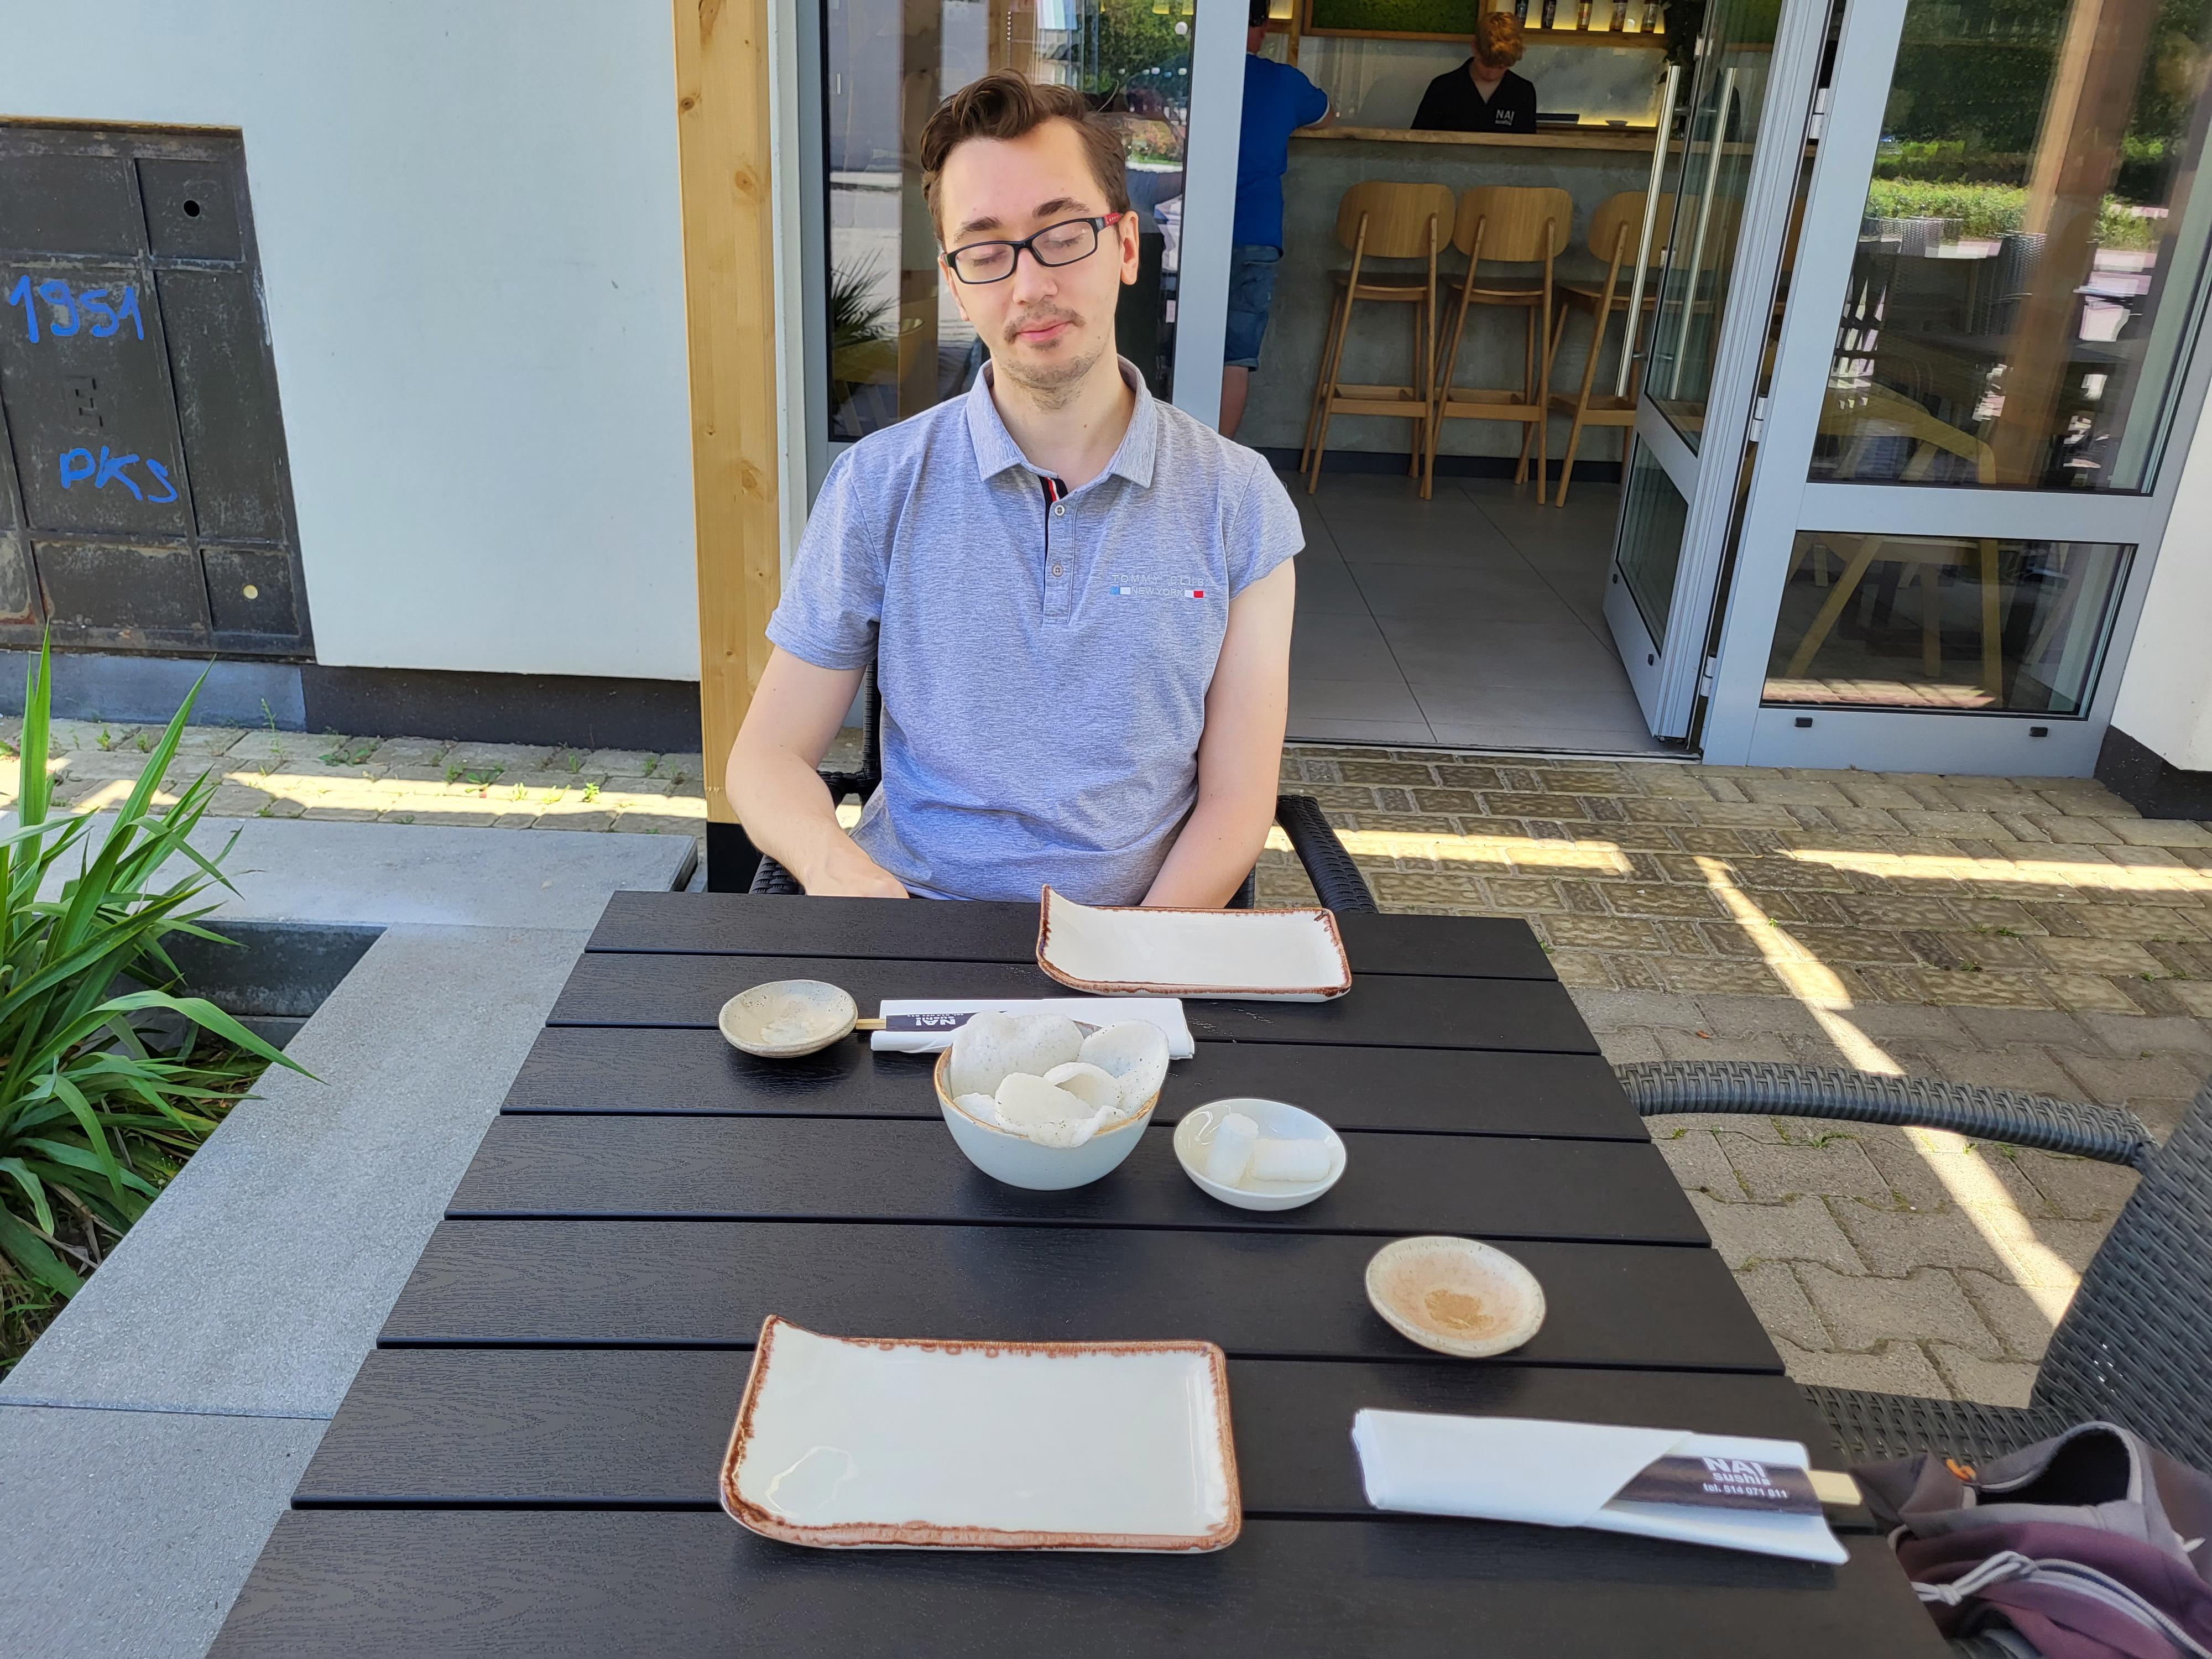

/tmp/ipykernel_1402/4215450244.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(heic_file_path)


{'model': 'llava',
 'created_at': '2024-08-06T07:32:04.682372979Z',
 'message': {'role': 'assistant',
  'content': ' There is only one person on the image. '},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 8209124040,
 'load_duration': 7446077456,
 'prompt_eval_count': 1,
 'prompt_eval_duration': 391463000,
 'eval_count': 11,
 'eval_duration': 204643000}

In [1]:
from io import BytesIO
image_loc: str = '/z-aparatu/20240721_134802.heic'

import imageio
import ollama
import base64

# display the image
from IPython.display import display, Image as DisplayImage

import imageio.v3 as iio
from PIL import Image as PILImage

def heic_to_base64(heic_file_path):
    image = imageio.imread(heic_file_path)

    pil_image = PILImage.fromarray(image)

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")

    img_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_base64


def display_heic_image(image_path) -> None:
    # Read the HEIC image
    heic_image = iio.imread(image_path)

    # Convert the numpy array to a PIL image
    pil_image = PILImage.fromarray(heic_image)

    # Save the PIL image to a BytesIO object in JPEG format
    img_buffer = BytesIO()
    pil_image.save(img_buffer, format='JPEG')
    img_buffer.seek(0)  # Rewind the buffer to the beginning

    # Display the image
    display(DisplayImage(data=img_buffer.read(), format='jpeg'))

display_heic_image(image_loc)

res = ollama.chat(
	model="llava",
	messages=[
        {
			'role': 'system',
            'content': 'Answer about received photos using polish language.',
		},
		{
			'role': 'user',
            'content': 'How many people are on the image?',
			'images': [heic_to_base64(image_loc)]
		}
	]
)


# Display AI response
display(res)

